<a href="https://colab.research.google.com/github/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/blob/main/04_13_2021_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Household Income in Baltimore, MD and New York, NY







*   How does the average household income differ between the two cities? 
*   How may parent's household income affect child's household income? 

# Import Library

In [ ]:
# import libraries

# data analysis
import pandas as pd
import numpy as np
from functools import reduce

# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# download files to our computer
from google.colab import files 

# Import Datasets

In [ ]:
# Import Baltimore Household Income datasets 
df_Bal_all = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/baltimore_all_parent_income_rP_gP_pall.csv")
df_Bal_high = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/baltimore_high_parent_income_rP_gP_p75.csv")
df_Bal_middle = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/baltimore_middle_parent_incomerP_gP_p50.csv")
df_Bal_low = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/baltimore_low_parent_income_rP_gP_p25.csv")

# Import New York Household Income datasets 
df_NY_all = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/ny_all_parent_income_rP_gP_pall.csv")
df_NY_high = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/ny_high_parent_income_rP_gP_p75.csv")
df_NY_middle = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/ny_middle_parent_income_rP_gP_p50.csv")
df_NY_low = pd.read_csv("https://raw.githubusercontent.com/sophiaxuu/proj4-compare-Baltimore-NewYork-household-income/main/ny_low_parent_income_rP_gP_p25.csv")


In [ ]:
# Preview data to check if import is successful 
# Notice here that not all rows is in Baltimnore 
df_Bal_all.head(10)

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall
0,24005403803,"Pikesville, MD",76622.0
1,24005403601,"Baltimore, MD",68109.0
2,24005490500,"Towson, MD",66340.0
3,24027601104,"Ellicott City, MD",65322.0
4,24005403500,"Pikesville, MD",64865.0
5,24005400500,"Catonsville, MD",64347.0
6,24005491000,"Baltimore, MD",64047.0
7,24005400400,"Catonsville, MD",63941.0
8,24005490400,"Towson, MD",63182.0
9,24005490603,"Baltimore, MD",59609.0


In [ ]:
# Preview data to check if import is successful 
df_NY_all.head(10)

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall
0,36061000900,"Lower Manhattan, New York, NY",97485.0
1,36059406400,"Garden City, NY",92716.0
2,36059302101,"Roslyn, NY",91376.0
3,36059302501,"Roslyn Heights, NY",90337.0
4,36059411500,"Hewlett, NY",89945.0
5,36059517705,"Glen Head, NY",88453.0
6,36059406501,"Garden City, NY",88167.0
7,36059301700,"Manhasset, NY",87499.0
8,36059412600,"Rockville Centre, NY",87260.0
9,36061012800,"Lenox Hill, New York, NY",86782.0


In [ ]:
# Overall understanding of the dataset 
df_Bal_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   tract                                                 352 non-null    int64  
 1   Name                                                  352 non-null    object 
 2   Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall  348 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.4+ KB


# Filtering the data

In [ ]:
# Filter out data for Baltimore City only
df_Bal_all= df_Bal_all[df_Bal_all["Name"].str.contains("Baltimore, MD")]
df_Bal_high= df_Bal_high[df_Bal_high["Name"].str.contains("Baltimore, MD")]
df_Bal_middle= df_Bal_middle[df_Bal_middle["Name"].str.contains("Baltimore, MD")]
df_Bal_low= df_Bal_low[df_Bal_low["Name"].str.contains("Baltimore, MD")]

# Check if filtering works
df_Bal_all.head(10)

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall
1,24005403601,"Baltimore, MD",68109.0
6,24005491000,"Baltimore, MD",64047.0
9,24005490603,"Baltimore, MD",59609.0
11,24510271200,"Homeland, Baltimore, MD",59192.0
12,24510271501,"Mount Washington, Baltimore, MD",58794.0
16,24510271400,"Evergreen, Baltimore, MD",56479.0
17,24005490601,"Baltimore, MD",56311.0
18,24005490602,"Baltimore, MD",56144.0
19,24005491100,"Baltimore, MD",55977.0
20,24005440100,"Baltimore, MD",55809.0


In [ ]:
# Filter out data for New York City only
df_NY_all= df_NY_all[df_NY_all["Name"].str.contains("New York, NY")]
df_NY_high= df_NY_high[df_NY_high["Name"].str.contains("New York, NY")]
df_NY_middle= df_NY_middle[df_NY_middle["Name"].str.contains("New York, NY")]
df_NY_low= df_NY_low[df_NY_low["Name"].str.contains("New York, NY")]

# Check if filtering works
df_NY_all.head(10)

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall
0,36061000900,"Lower Manhattan, New York, NY",97485.0
9,36061012800,"Lenox Hill, New York, NY",86782.0
10,36061013000,"Lenox Hill, New York, NY",86402.0
16,36061015001,"Upper East Side, New York, NY",82648.0
34,36061015002,"Upper East Side, New York, NY",79508.0
41,36061016001,"Upper East Side, New York, NY",78455.0
54,36061014200,"Upper East Side, New York, NY",76871.0
61,36061010601,"Midtown, New York, NY",76269.0
91,36061014802,"Upper East Side, New York, NY",73994.0
100,36061008603,"Midtown, New York, NY",73520.0


# Cleaning the datasets 

In [ ]:
# remove all void value in Baltimore datasets
df_Bal_all = df_Bal_all.dropna()
df_Bal_high = df_Bal_high.dropna()
df_Bal_middle = df_Bal_middle.dropna()
df_Bal_low = df_Bal_low.dropna()

# remove all void value in New York datasets
df_NY_all = df_NY_all.dropna()
df_NY_high = df_NY_high.dropna()
df_NY_middle = df_NY_middle.dropna()
df_NY_low = df_NY_low.dropna()

# Plot Average Individual Income for residents in Baltimore vs New York

## Calculate the average household income in Baltimore and New York

In [ ]:
# Take Average of Household_Income in Baltimore 
income_Bal_all = df_Bal_all['Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall'] 
avg_Bal_income = sum(income_Bal_all)/len(income_Bal_all)
print(avg_Bal_income)

# Take Average of Household_Income in New York 
income_NY_all = df_NY_all['Household_Income_Stayed_in_Commuting_Zone_rP_gP_pall'] 
avg_NY_income = sum(income_NY_all)/len(income_NY_all)
print(avg_NY_income)

29685.94298245614
43919.86496350365


## Figure 1: Average Individual Income for residents in Baltimore vs New York

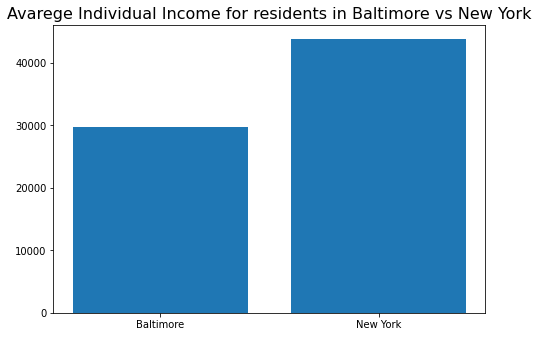

In [ ]:
# Plot for bar chart 
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
x = ['Baltimore', 'New York']
y = [avg_Bal_income, avg_NY_income]
ax.bar(x,y)
plt.title('Figure 1: Avarege Individual Income for residents in Baltimore vs New York', fontsize=16)
plt.show()

In [ ]:
# save the figure1
fig1.savefig("avg_ind_income_comparison.png")

# downloading the figure
files.download("avg_ind_income_comparison.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot Average Residents Income by Parents' Income Level in Baltimore and New York 

## Merging datasets

In [ ]:
# New dataframe to merge Baltimore datasets
data_frames_Bal = [df_Bal_high, df_Bal_middle, df_Bal_low]

# Merge by function reduce 
df_Bal_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Name", "tract"], how="left"), data_frames_Bal).fillna('void')

# Change Value Under Name to be Baltimore
df_Bal_merged["Name"] = np.where(df_Bal_merged["Name"] == df_Bal_merged["Name"].str.contains("Baltimore, MD"), "Baltimore, MD", "Baltimore, MD")

# Check if merge work 
df_Bal_merged.head()

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25
0,24005403601,"Baltimore, MD",67143.0,61472.0,56327
1,24005440100,"Baltimore, MD",66178.0,47423.0,33346
2,24510261100,"Baltimore, MD",62153.0,44451.0,30911
3,24005491000,"Baltimore, MD",61071.0,56440.0,52224
4,24510260605,"Baltimore, MD",58997.0,41091.0,27190


In [ ]:
# New dataframe to merge New York datasets
data_frames_NY = [df_NY_high, df_NY_middle, df_NY_low]

# Merge by function reduce 
df_NY_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Name", "tract"], how="left"), data_frames_NY).fillna('void')

# Change Value Under Name to be New York
df_NY_merged["Name"] = np.where(df_NY_merged["Name"] == df_NY_merged["Name"].str.contains("New York, NY"), "New York, NY", "New York, NY")


# Check if merge work 
df_NY_merged.head()

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25
0,36061002700,"New York, NY",93596.0,67027.0,47631
1,36061000800,"New York, NY",86286.0,64891.0,48460
2,36061001800,"New York, NY",85568.0,62445.0,45174
3,36061002900,"New York, NY",83710.0,64059.0,48722
4,36061001600,"New York, NY",78267.0,61263.0,47755


In [ ]:
# Combine two dataframe 
df_Bal_NY_merged = pd.concat([df_Bal_merged, df_NY_merged], axis = 0, sort = False)

In [ ]:
# Show Head of merged data
df_Bal_NY_merged.head()

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25
0,24005403601,"Baltimore, MD",67143.0,61472.0,56327
1,24005440100,"Baltimore, MD",66178.0,47423.0,33346
2,24510261100,"Baltimore, MD",62153.0,44451.0,30911
3,24005491000,"Baltimore, MD",61071.0,56440.0,52224
4,24510260605,"Baltimore, MD",58997.0,41091.0,27190


In [ ]:
# Show Tail of merged data
df_Bal_NY_merged.tail()

,tract,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25
269,36061021600,"New York, NY",24987.0,24316.0,23662
270,36061002202,"New York, NY",24306.0,26383.0,28419
271,36061021303,"New York, NY",23552.0,24651.0,25722
272,36061022200,"New York, NY",22407.0,22345.0,22284
273,36061023502,"New York, NY",16352.0,19193.0,22056


## Cleaning Merged Data  

In [ ]:
df_Bal_NY_merged.columns.tolist()

['tract',
 'Name',
 'Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75',
 'Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50',
 'Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25']

In [ ]:
# Drop null values 
df_Bal_NY_merged.dropna()

# Remove void values 
df_Bal_NY_merged = df_Bal_NY_merged[df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75"] != "void"]
df_Bal_NY_merged = df_Bal_NY_merged[df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50"] != "void"]
df_Bal_NY_merged = df_Bal_NY_merged[df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25"] != "void"]


In [ ]:
df_Bal_NY_merged["Name"].unique()

array(['Baltimore, MD', 'New York, NY'], dtype=object)

In [ ]:
# change value datatype from string to float
df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75"] = df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75"].astype(float)
df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50"] = df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50"].astype(float)
df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25"] = df_Bal_NY_merged["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25"].astype(float)


## Create Pivot Tables for average household income 

In [ ]:
# pivot table
df_pivot_table = pd.pivot_table(df_Bal_NY_merged,
                                 index = ["Name"],
                                 values = ["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75", "Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50", "Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25"],
                                 aggfunc = np.mean).reset_index()

In [ ]:
df_pivot_table

,Name,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50,Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75
0,"Baltimore, MD",24915.535398,31417.150442,38675.296460
1,"New York, NY",34930.567164,40993.440299,48128.902985


## Create Figure 2: Average Residents Income by Parents' Income Level in Baltimore and New York 

In [ ]:
cities = ["Baltimore, MD", "New York, NY"]

income_by_parent_income = go.Figure(
    data=[go.Bar(name = "Average Household Income with High Income Parents", x = cities, y = df_pivot_table["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p75"]),
          go.Bar(name = "Average Household Income with Middle Income Parents", x = cities, y = df_pivot_table["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p50"]),
          go.Bar(name = "Average Household Income with Low Income Parents", x = cities, y = df_pivot_table["Household_Income_Stayed_in_Commuting_Zone_rP_gP_p25"])])

income_by_parent_income.update_layout(
            title = "Average Residents Income by Parents' Income Level in Baltimore and New York",
            xaxis_title = "City",
            yaxis_title = "Average Household Income")


In [ ]:
# save the figure2 as html 
income_by_parent_income.write_html("income_by_parent_income.html")

# download the file
files.download("income_by_parent_income.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>